In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

# Model Build

In [2]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

Preparing our data

In [3]:
from keras.applications.resnet import preprocess_input

In [4]:
def preprocessingImages1(path):

  """
  input : Path
  output: Pre processed images
  """

  image_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,# rescale=1/255 in case of self model
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

  image = image_datagen.flow_from_directory(
      directory = path,  # this is the target directory
      target_size=(224, 224),
      batch_size=32,
      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

  return image


In [5]:
path = "train"
train_data = preprocessingImages1(path)

Found 1006 images belonging to 2 classes.


In [6]:
def preprocessingImages2(path):

  """
  input : Path
  output: Pre processed images
  """

  image_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)# rescale=1/255 in case of self model

  image = image_datagen.flow_from_directory(
      directory = path,  # this is the target directory
      target_size=(224, 224),
      batch_size=32,
      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

  return image

In [7]:
path = "test"
test_data = preprocessingImages2(path)

Found 58 images belonging to 2 classes.


In [8]:
path = "val"
val_data = preprocessingImages2(path)

Found 360 images belonging to 2 classes.


## MODEL TRAINING Prebuilt

In [9]:
import numpy as np
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.resnet import ResNet50

In [10]:
base_model = ResNet50(input_shape=(224,224,3), include_top=False)

In [11]:
for layer in base_model.layers:
  layer_trainable = False


In [12]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)


model = Model(base_model.input, X)

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,688,065 (90.36 MB)

 Trainable params: 23,634,945 (90.16 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [14]:
model.compile(keras.optimizers.Adam(learning_rate=0.0001), 
              loss= keras.losses.binary_crossentropy, 
              metrics=['accuracy'])

In [15]:
#Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=8, verbose=1, mode="auto")

#Model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./ResNetmodel.keras", verbose=1, save_best_only=True, mode="auto")

cd = [ mc]

Model Training

In [16]:
batch_size = 32

In [17]:
hs = model.fit(x = train_data,
                steps_per_epoch=len(train_data)//batch_size,
                epochs = 40,
                verbose=1,
                validation_data = val_data,
                validation_steps = len(val_data)//batch_size,
                callbacks=cd)

Epoch 1/40


C:\Users\kumar\Desktop\Image_Processing_Projectexhibition\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61s/step - accuracy: 0.3125 - loss: 1.5420
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./ResNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 106s 106s/step - accuracy: 0.3125 - loss: 1.5420 - val_accuracy: 0.5000 - val_loss: 2.6848
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3750 - loss: 2.8241
Epoch 2: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 44s 44s/step - accuracy: 0.3750 - loss: 2.8241 - val_accuracy: 0.4972 - val_loss: 1.7702
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6562 - loss: 1.0846
Epoch 3: val_accuracy improved from 0.50000 to 0.57778, saving model to ./ResNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 46s 46s/step - accuracy: 0.6562 - loss: 1.0846 - val_accuracy: 0.5778 - val_loss: 0.8609
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6562 - loss: 0.8821
Epoch 4: val_accuracy improved from 0.57778 to 0.60556, saving model to ./ResNetmodel.keras
1/1 ━━━━━━━━━━━━━━

Epoch 26/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7812 - loss: 0.3374
Epoch 26: val_accuracy improved from 0.71667 to 0.73611, saving model to ./ResNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step - accuracy: 0.7812 - loss: 0.3374 - val_accuracy: 0.7361 - val_loss: 0.6302
Epoch 27/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8125 - loss: 0.4805
Epoch 27: val_accuracy did not improve from 0.73611
1/1 ━━━━━━━━━━━━━━━━━━━━ 42s 42s/step - accuracy: 0.8125 - loss: 0.4805 - val_accuracy: 0.7278 - val_loss: 0.6861
Epoch 28/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8438 - loss: 0.2170
Epoch 28: val_accuracy did not improve from 0.73611
1/1 ━━━━━━━━━━━━━━━━━━━━ 47s 47s/step - accuracy: 0.8438 - loss: 0.2170 - val_accuracy: 0.7306 - val_loss: 0.7211
Epoch 29/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7812 - loss: 0.4021
Epoch 29: val_accuracy improved from 0.73611 to 0.74444, saving model to ./ResNetmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 54s 54s/step -

C:\Users\kumar\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 33: val_accuracy did not improve from 0.76944
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6528 - val_loss: 0.8766
Epoch 34/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.8438 - loss: 0.3770
Epoch 34: val_accuracy did not improve from 0.76944
1/1 ━━━━━━━━━━━━━━━━━━━━ 64s 64s/step - accuracy: 0.8438 - loss: 0.3770 - val_accuracy: 0.6306 - val_loss: 1.1309
Epoch 35/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9375 - loss: 0.1399
Epoch 35: val_accuracy did not improve from 0.76944
1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step - accuracy: 0.9375 - loss: 0.1399 - val_accuracy: 0.6000 - val_loss: 1.3757
Epoch 36/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 0.1492
Epoch 36: val_accuracy did not improve from 0.76944
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - accuracy: 1.0000 - loss: 0.1492 - val_accuracy: 0.5778 - val_loss: 1.5715
Epoch 37/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9375 - loss: 0.08

Graphical Interpretation

In [18]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'acc vs val-acc')

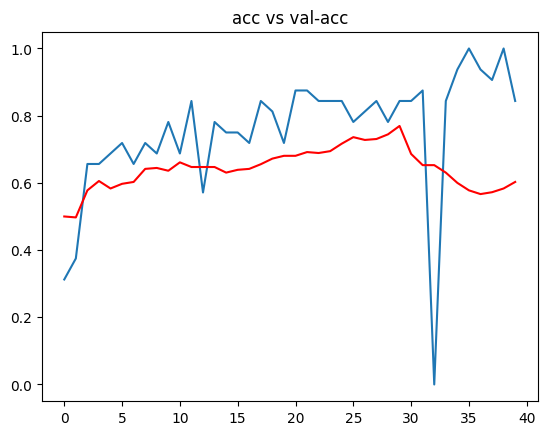

In [19]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("acc vs val-acc")

Text(0.5, 1.0, 'loss vs val-loss')

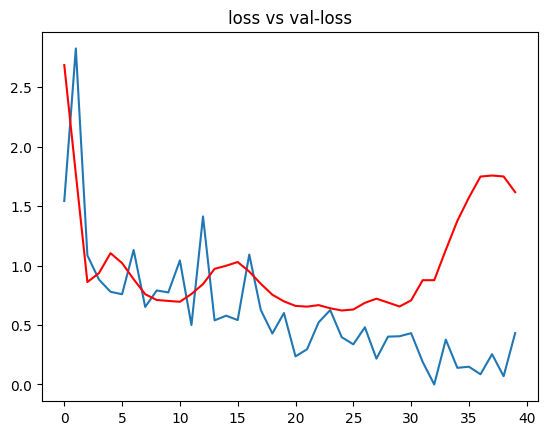

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")

plt.title("loss vs val-loss")

In [21]:
#Model Accuracy

from keras.models import load_model

model = load_model("./ResNetmodel.keras")

**Model Accuracy**

In [22]:
acc = model.evaluate(test_data)[1]

print(f"the accuracy of our model is {acc*100} %")

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7892 - loss: 0.4799
the accuracy of our model is 79.31034564971924 %


In [23]:
train_data.class_indices

{'CVD': 0, 'NotCVD': 1}

In [24]:
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
Predictions:
[[0.85891706]]


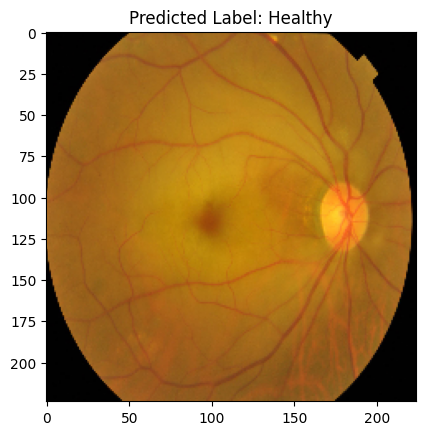

In [53]:
path = "./test/NotCVD/202efd3d-8d87-11e8-9daf-6045cb817f5b..JPG"
img = image.load_img(path, target_size = (224, 224))

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

plt.imshow(img)

predictions = model.predict(input_arr)
predictions

# Print the predictions
print("Predictions:")
print(predictions)
# Get the predicted label
predicted_label = "Healthy" if predictions > 0.8473 else "Cardiovascular Disease"



plt.title("Predicted Label: " + predicted_label)
plt.show()